In [1]:
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt

In [56]:
t_e = (r_inner**2 + beta / (2*alpha)) / (r**2 + beta / (2*alpha))
t_e = -np.log(t_e)/(4 * mu_e * alpha)
t_h = (r_outer**2 + beta / (2*alpha)) / (r**2 + beta / (2*alpha))
t_h = np.log(t_h) / (4 * mu_h * alpha)

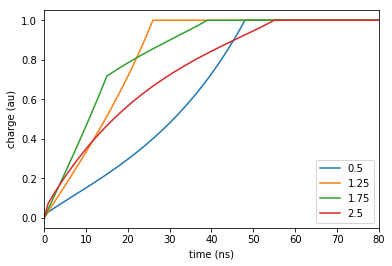

In [59]:
def siggen(r0):
    assert r0 > r_inner or r0 > r_outer
    time = np.arange(0, 200)
    q_e_vals = []
    q_h_vals = []
    t_e = -np.log((r_inner**2 + beta/(2*alpha))/(r0**2 + beta/(2*alpha)))/(4 * mu_e * alpha)
    t_h = np.log((r_outer**2 + beta/(2*alpha))/(r0**2 + beta/(2*alpha)))/(4 * mu_h * alpha)
    i = 0
    for t in time:
        if t < t_e:
            r_e = np.sqrt((r0**2 + beta/(2*alpha)) * np.exp(-4 * alpha * mu_e * t) - beta/(2*alpha))
            q_e = (alpha * (r0 ** 2 - r_e ** 2)) / V + (beta / V) * np.log(r0 / r_e)
            q_e_vals.append(q_e)
        else:
            q_e_vals.append(q_e_vals[i-1])
        if t < t_h:
            r_h = np.sqrt((r0 ** 2 + beta/(2*alpha)) * np.exp(4 * alpha * mu_e * t) - beta/(2*alpha))
            q_h = (alpha / V) * (r_h ** 2 - r0 ** 2) + (beta / V) * np.log(r_h / r0)        
            q_h_vals.append(q_h)
        else:
            q_h_vals.append(q_h_vals[i-1])
        i += 1
    q_e_vals = np.array(q_e_vals)
    q_h_vals = np.array(q_h_vals)
    
    q = q_e_vals + q_h_vals

    return time, q


mu_e = (3.6 * 10 ** 4)/(10**9)
mu_h = (4.2 * 10 ** 4)/(10**9) 
r_inner = 0.455  # cm
r_outer = 2.615  # cm
eps_0 = 8.85 * 10 ** (-14) 
eps = 16 * eps_0
rho = 10**10  # cm^-3
q = 1.6 * 10 ** (-19)
V = 2360 # V

alpha = (q * rho) / (4 * eps)
beta = (V - (alpha * (r_outer**2 - r_inner**2)))/np.log(r_outer/r_inner)

time = np.arange(0, 200)
radius_values = [0.5, 1.25, 1.75 ,2.5]
radius_1 = radius_values[0]
radius_2 = radius_values[1]
radius_3 = radius_values[2]
radius_4 = radius_values[3]

time, q_1 = siggen(radius_1)
time, q_2 = siggen(radius_2)
time, q_3 = siggen(radius_3)
time, q_4 = siggen(radius_4)

q_1 = q_1 / np.max(q_1)
q_2 = q_2 / np.max(q_2)
q_3 = q_3 / np.max(q_3)
q_4 = q_4 / np.max(q_4)

plt.plot(time, q_1, label=str(radius_1))
plt.plot(time, q_2, label=str(radius_2))
plt.plot(time, q_3, label=str(radius_3))
plt.plot(time, q_4, label=str(radius_4))
plt.legend()
plt.xlim([0, 80])
plt.xlabel('time (ns)')
plt.ylabel('charge (au)')
plt.show()

In [ ]:
# event selection filters PC, PT ratios
# TIMING
# parameterize the time profile of the rising edge in terms of fractio on totoal induced charge
# t_rise = t_90 - t_10
# various ranges of rise time - comment on variations in the PC and PT

# look at distribution of rise times all, photopeak
# create energy spectra with (4) diff cuts, comment on PC and PT, choose filter to improve PC ratio

# PREDICT SIGNAL SHAPE
# predict signal shape at one radial location in detector
# using collimated souce experimetally validate shape
# repeat for multiple radial locations
# preditc signal shapes from multiple gamma-ray interactions (?), can you find any in data that match

# PILE-UP
# using strong gamma source take data
# evaluate trade-off btwn energy res and pile-up for diff filters

In [85]:
# RISE TIME STUDY

# calc signal rise time
# make spectrum
# calc resolution of peak
# calc PC ratio
# calc PT ratio

# do with diff rise-time windows

# make hist of rise times all, photopeak for cs
# repeat diff sources

# do get finer timing, interpolate between points!

In [86]:
%run ./lab2_analysis_functions.py

In [87]:
def calculate_signal_rise_time(signal, plot=False):
    maxval = np.amax(signal)
    tenval = np.amax(signal)* 0.1
    ninetyval = np.amax(signal) * 0.9
    minindex = 0
    maxindex = 0
    for i in range(0, np.argmax(signal), 1):
        if signal[i] <= tenval:
            minindex = i
            #break
    for i in range(minindex, len(signal), 1):
        if signal[i] >= ninetyval:
            maxindex = i
            break
    risetime = (maxindex - minindex) * 10 # ns
    if plot==True and risetime > 1500:
         print(risetime)
         plt.plot(signal)
         plt.plot(maxindex, ninetyval, 'o')
         plt.plot(minindex, tenval, 'o')
         plt.show()
    return risetime

In [88]:
filename = '../data/Cs_70cm.h5'

hf = tables.open_file(filename, "r")
cs_raw_data = import_data(filename)
cs_event_data = hf.root.EventData.read()
hf.close()

# mask retriggered events
mask = (cs_event_data['retrigger'] == 1)
cs_raw_data[mask] = 0

In [89]:
cs_baseline = np.mean(cs_raw_data[:len(cs_raw_data),0:99],1).reshape((len(cs_raw_data),1))
cs_baseline_corrected_signals = cs_raw_data[:len(cs_raw_data),] - cs_baseline

In [90]:
cs_risetimes= []
i = 0
for sig in cs_baseline_corrected_signals:
    dt = calculate_signal_rise_time(sig, plot=False)
    cs_risetimes.append(dt)
    i += 1

29330
263.516137343
0
170784


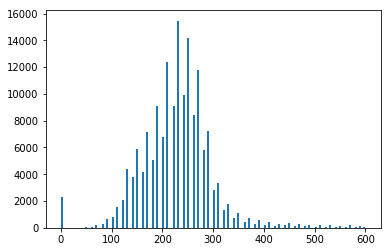

In [91]:
print(max(cs_risetimes))
print(np.mean(cs_risetimes))
print(min(cs_risetimes))
print(len(cs_risetimes))
# cs_risetimes = np.multiply(cs_risetimes, 10), range)
plt.hist(cs_risetimes, (1500/10), range=[0, 600])
plt.show()

In [92]:
# mask events outside of risetime range
risetime_mask = np.array(50 < cs_risetimes < 500)
data = cs_event_data['ADC_value'][risetime_mask]
#mask = (cs_event_data['retrigger'] == 1)

In [93]:
cs_risetimes = np.array(cs_risetimes)
cs_nrgs = cs_event_data['ADC_value']
# print(cs_nrgs)
risetime_mask = np.zeros_like(cs_nrgs)
print(risetime_mask.size)
print(cs_risetimes.size)
risetime_mask =((cs_risetimes > 100) & (cs_risetimes < 500))
cs_nrgs_filtered = cs_event_data['ADC_value'][risetime_mask]
print(risetime_mask)
print()

170784
170784
[False  True False ...,  True  True  True]



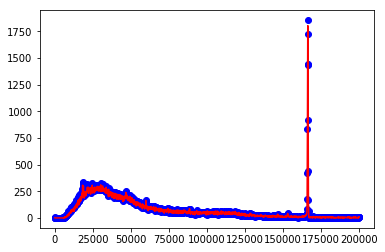

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # function evals   = 23
    # data points      = 200
    # variables        = 3
    chi-square         = 32107.766
    reduced chi-square = 162.984
    Akaike info crit   = 1021.707
    Bayesian info crit = 1031.602
[[Variables]]
    sigma:       200.737107 +/- 1.052300 (0.52%) (init= 146.4844)
    center:      1.6621e+05 +/- 1.052300 (0.00%) (init= 166210.9)
    amplitude:   9.0791e+05 +/- 4.12e+03 (0.45%) (init= 792334)
    fwhm:        472.699754 +/- 2.477978 (0.52%)  == '2.3548200*sigma'
    height:      1804.35922 +/- 8.191545 (0.45%)  == '0.3989423*amplitude/max(1.e-15, sigma)'
[[Correlations]] (unreported correlations are <  0.500)
    C(sigma, amplitude)          =  0.577 



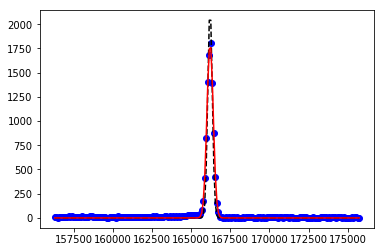

ValueError: too many values to unpack

In [94]:
cs_counts, bin_edges = np.histogram(cs_nrgs, bins=2048, range=[0,2e5])
cs_bins = (bin_edges[1:]+bin_edges[:-1])/2 # bin centers from bin edges
plt.plot(cs_bins, cs_counts, 'bo')
cs_counts, bin_edges = np.histogram(cs_nrgs_filtered, bins=2048, range=[0,2e5])
cs_bins = (bin_edges[1:]+bin_edges[:-1])/2 # bin centers from bin edges
plt.plot(cs_bins, cs_counts, 'r-')
plt.show()
cs_peak_fwhm, cs_peak_center = fit_gaussian_with_plot(cs_bins[1600:1800], cs_counts[1600:1800])
print(cs_peak_fwhm)
print(cs_peak_center)
print('fwhm', (round(cs_peak_fwhm / cs_peak_center, 7) * 100))
print((err * 100 / cs_peak_center))

In [ ]:
def calculate_pt(bins, counts):
    center = np.argmax(counts)
    cs_peak_fwhm, cs_peak_center = fit_gaussian_with_plot(cs_bins[1600:1800], cs_counts[1600:1800])
    
    
def calculate_pc(bins, counts):
    center = np.argmax(counts)
    cs_peak_fwhm, cs_peak_center = fit_gaussian_with_plot(cs_bins[1600:1800], cs_counts[1600:1800])
    

In [ ]:
cs_risetimes= []
for sig in cs_baseline_corrected_signals:
    dt = calculate_signal_rise_time(sig)
    cs_risetimes.append(dt)
#print(cs_risetimes)

In [ ]:
print(min(cs_risetimes))
print(max(cs_risetimes))

In [ ]:
plt.hist(cs_risetimes, 100)
plt.show()

In [ ]:
number_of_events = len(cs_raw_data)

k_fwhm_values = []
k_fwhm_values_err = []
k_fwhm_pulser_values = []
k_values_ns = []

m = 25
k = 1164

nbins = 2048

cs_nrgs=[]
cs_nrgs = np.apply_along_axis(fast_trapezoidal_filter_energy, 1, 
                              cs_baseline_corrected_signals, k, m, M)
    
cs_counts, bin_edges = np.histogram(cs_nrgs, bins=2048, range=[0,2048])
cs_bins = (bin_edges[1:]+bin_edges[:-1])/2 # bin centers from bin edges
plt.plot(cs_bins, cs_counts)
plt.show()
cs_peak_fwhm, cs_peak_center, err = fit_gaussian_peak_linear_background(cs_bins, cs_counts)
k_fwhm_values.append(round(cs_peak_fwhm / cs_peak_center, 7) * 100)
k_fwhm_values_err.append(err * 100 / cs_peak_center)
    
plt.figure()
plt.cla()
plt.clf()
plt.xlabel('gap time (ns)')
plt.ylabel('fwhm (%)')
plt.errorbar(m_values_ns, m_fwhm_values, yerr=m_fwhm_values_err, ecolor='b')
plt.plot(m_values_ns, m_fwhm_values, 'o-b')
plt.title('Gap vs Energy Resolution')
plt.savefig('../figures/gap_optimization_cs.pdf')
plt.show()

In [ ]:
cs_nrgs = np.apply_along_axis(fast_trapezoidal_filter_energy, 1, 
                              cs_baseline_corrected_signals, k, m, M)
co_nrgs = np.apply_along_axis(fast_trapezoidal_filter_energy, 1, 
                              co_baseline_corrected_signals, k, m, M)
am_nrgs = np.apply_along_axis(fast_trapezoidal_filter_energy, 1, 
                              am_baseline_corrected_signals, k, m, M)

In [ ]:
tenevents = read_ten_event_file()
ndata = len(tenevents)
nsamples = 4096
tenevents = fast_baseline_correction(tenevents)

risetimes= []
for sig in tenevents:
    dt = calculate_signal_rise_time(sig)
    risetimes.append(dt)
print(risetimes)
plt.hist(risetimes)
plt.show()

In [ ]:
%run ./lab1_analysis_functions.py

In [19]:
tenevents = read_ten_event_file()

M = find_M_value(tenevents)
print('M ', M)

('M ', 4445.9118105773478)


In [20]:
filename = '../data/Am_pulser_real.h5'
am_raw_data = import_data(filename)

filename = '../data/Cs_pulser_real.h5'
cs_raw_data = import_data(filename)

filename = '../data/Co_pulser_real.h5'
co_raw_data = import_data(filename)

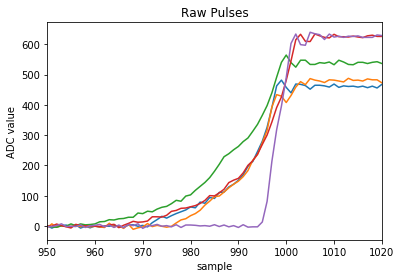

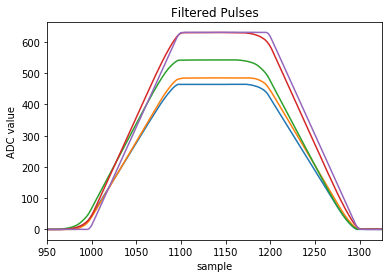

In [7]:
tenevents = read_ten_event_file()
ndata = len(tenevents)
nsamples = 4096
x_values = np.linspace(0, nsamples, nsamples)
tenevents = fast_baseline_correction(tenevents)
plt.figure()
plt.cla()
plt.clf()
for event in tenevents[0:5]:
    plt.plot(event)
plt.xlim([950, 1020])
plt.title('Raw Pulses')
plt.ylabel('ADC value')
plt.xlabel('sample')
plt.savefig('../figures/tenevents_rawdata.pdf')
plt.show()

k = 100
m = 100

plt.figure()
plt.cla()
plt.clf()
for event in tenevents[0:5]:
    event = fast_trapezoidal_filter(event, k, m, M=4400)
    plt.plot(x_values, event)
plt.xlim([950, 1325])
plt.title('Filtered Pulses')
plt.ylabel('ADC value')
plt.xlabel('sample')
plt.savefig('../figures/tenevents_filtered.pdf')
plt.show()

In [5]:
filename = '../data/Am_pulser_real.h5'
am_raw_data = import_data(filename)

filename = '../data/Cs_pulser_real.h5'
cs_raw_data = import_data(filename)

filename = '../data/Co_pulser_real.h5'
co_raw_data = import_data(filename)

In [6]:
cs_baseline = np.mean(cs_raw_data[:len(cs_raw_data),0:799],1).reshape((len(cs_raw_data),1))
cs_baseline_corrected_signals = cs_raw_data[:len(cs_raw_data),] - cs_baseline

In [7]:
# M = find_M_value(cs_baseline_corrected_signals[0:len(cs_raw_data)])
M = 5920.5649833
optimal_M = M
print('optimal M: ', M)

('optimal M: ', 5920.5649833)


In [9]:
# OPTIMIZE GAP TIME

m_values = np.linspace(0, 100, 30)
k = 100

number_of_events = len(cs_raw_data)
#number_of_events = 10000
assert number_of_events <= len(cs_raw_data)
ndata = 4096

m_fwhm_values = []
m_values_ns = []
m_fwhm_values_err = []

for m in m_values:
    m = int(m)
    m_values_ns.append(m * 10)
    
    cs_nrgs=[]
    cs_nrgs = np.apply_along_axis(fast_trapezoidal_filter_energy, 1, cs_baseline_corrected_signals, k, m, M)
    nbins = 2048
    cs_counts, bin_edges = np.histogram(cs_nrgs, bins=2048, range=[0,512]) #, range=Cs_range) # WORKS
    cs_bins = (bin_edges[1:]+bin_edges[:-1])/2 # bin centers from bin edges
    cs_fwhm, cs_center, err = fit_gaussian_peak_linear_background(cs_bins[1000:2000], cs_counts[1000:2000])
    m_fwhm_values_err.append(err* 100 / cs_center)
    m_fwhm_values.append(round(cs_fwhm / cs_center, 7) * 100)

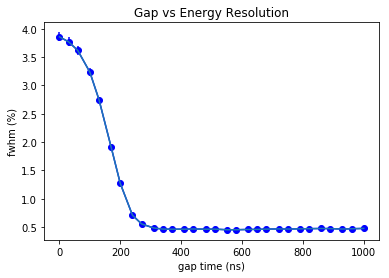

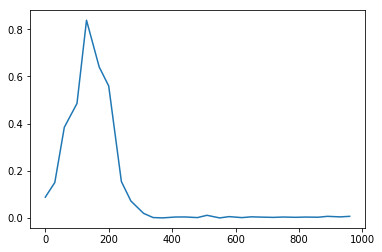

In [10]:
plt.figure()
plt.cla()
plt.clf()
plt.xlabel('gap time (ns)')
plt.ylabel('fwhm (%)')
plt.errorbar(m_values_ns, m_fwhm_values, yerr=m_fwhm_values_err, ecolor='b')
plt.plot(m_values_ns, m_fwhm_values, 'o-b')
plt.title('Gap vs Energy Resolution')
plt.savefig('../figures/gap_optimization_cs.pdf')
plt.show()

In [11]:
optimal_gap_time =  int(m_values_ns[np.argmin(m_fwhm_values)]) / 10
m = optimal_gap_time 
print('optimal gap time: ' + str(m * 10))

optimal gap time: 550


In [12]:
# OPTIMIZE PEAKING TIME

k_values = np.logspace(np.log10(10), np.log10(2000), 50, endpoint=True, base=10)
number_of_events = len(cs_raw_data)
assert number_of_events <= len(cs_raw_data)

k_fwhm_values = []
k_fwhm_values_err = []
k_fwhm_pulser_values = []
k_values_ns = []
m = 25

nbins = 2048

for k in k_values:
    k = int(k)
    k_values_ns.append(k * 10)
    
    cs_nrgs=[]
    cs_nrgs = np.apply_along_axis(fast_trapezoidal_filter_energy, 1, cs_baseline_corrected_signals, k, m, M)
    
    cs_counts, bin_edges = np.histogram(cs_nrgs, bins=2048, range=[0,512])
    cs_bins = (bin_edges[1:]+bin_edges[:-1])/2 # bin centers from bin edges
    cs_bins = cs_bins[1000:2000]
    cs_counts = cs_counts[1000:2000]
   # plt.plot(cs_bins, cs_counts)
   # plt.show()
    cs_peak_fwhm, cs_peak_center, err = fit_gaussian_peak_linear_background(cs_bins, cs_counts)

    k_fwhm_values.append(round(cs_peak_fwhm / cs_peak_center, 7) * 100)
    k_fwhm_values_err.append(err * 100 / cs_peak_center)

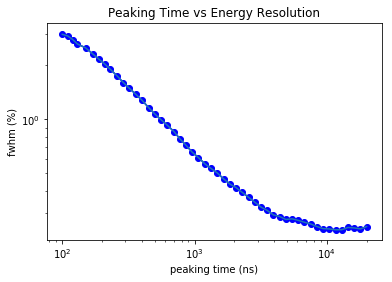

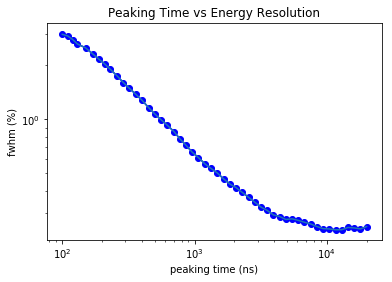

In [14]:
plt.figure()
plt.cla()
plt.clf()
plt.xlabel('peaking time (ns)')
plt.ylabel('fwhm (%)')
plt.loglog(k_values_ns, k_fwhm_values, 'o-b')
plt.errorbar(k_values_ns, k_fwhm_values, yerr=k_fwhm_values_err, ecolor='b')
plt.title('Peaking Time vs Energy Resolution')
plt.tick_params(axis='y', which='minor')
plt.savefig('../figures/peak_optimization_cs.pdf')
plt.show()

In [15]:
optimal_peaking_time = k_values_ns[np.argmin(k_fwhm_values)] / 10
k = optimal_peaking_time
print('optimal peaking time:' + str(k * 10))

('optimal peaking time: ', 1164)


In [16]:
# Final Filter Paramters
print("========  Final Filter Parameters  ========")
print(' gap time (m)     = ' + str(m * 10) + ' ns')
print(' peaking time (k) = ' + str(k * 10) + ' ns')
print(' decay time (M)   = ' + str(round(M / 10,2)) + ' ns')
print("===========================================")

save_parameters(m * 10 , k * 10 , M / 10)

========  Final Filter Parameters  ========
 gap time (m)     = 250 ns
 peaking time (k) = 11640 ns
 decay time (M)   = 592.06 ns


In [17]:
cs_baseline = np.mean(cs_raw_data[:len(cs_raw_data),0:799],1).reshape((len(cs_raw_data),1))
cs_baseline_corrected_signals = cs_raw_data[:len(cs_raw_data),] - cs_baseline

am_baseline = np.mean(am_raw_data[:len(am_raw_data),0:799],1).reshape((len(am_raw_data),1))
am_baseline_corrected_signals = am_raw_data[:len(am_raw_data),] - am_baseline

co_baseline = np.mean(co_raw_data[:len(co_raw_data),0:799],1).reshape((len(co_raw_data),1))
co_baseline_corrected_signals = co_raw_data[:len(co_raw_data),] - co_baseline

cs_nrgs = np.apply_along_axis(fast_trapezoidal_filter_energy, 1, cs_baseline_corrected_signals, k, m, M)
co_nrgs = np.apply_along_axis(fast_trapezoidal_filter_energy, 1, co_baseline_corrected_signals, k, m, M)
am_nrgs = np.apply_along_axis(fast_trapezoidal_filter_energy, 1, am_baseline_corrected_signals, k, m, M)

In [18]:
make_nrg_sample_file(co_nrgs[0:len(co_nrgs)], '../data/co_energies.txt')
make_nrg_sample_file(cs_nrgs[0:len(cs_nrgs)], '../data/cs_energies.txt')
make_nrg_sample_file(am_nrgs[0:len(am_nrgs)], '../data/am_energies.txt')

In [19]:
# GET ENERGY RESOLUTION FOR DIFFERENT PEAKS

fwhm_peak_values = []
fwhm_peak_energies = []
fwhm_pulser_values = []
peak_err = []
pulser_err = []

# AM-241
am_counts, bin_edges = np.histogram(am_nrgs, bins=2048, range=[0, 400])
am_bins = (bin_edges[1:]+bin_edges[:-1])/2 # bin centers from bin edges
am_bins = am_bins[10:250] 
am_counts = am_counts[10:250]
peak_fwhm, peak_center ,err = fit_gaussian_peak_linear_background(am_bins, am_counts)
fwhm_peak_values.append(round(peak_fwhm / peak_center, 7) * 100)
fwhm_peak_energies.append(59.536)
peak_err.append(err * 100 / peak_center)

# AM-PULSER

am_counts, bin_edges = np.histogram(am_nrgs, bins=2048, range=[0, 400])
am_bins = (bin_edges[1:]+bin_edges[:-1])/2 # bin centers from bin edges
am_bins = am_bins[1000:2000] 
am_counts = am_counts[1000:2000]
pulser_fwhm, pulser_center ,err = fit_gaussian_peak_linear_background(am_bins, am_counts)
fwhm_pulser_values.append(round(pulser_fwhm / pulser_center, 7) * 100)
pulser_err.append(err* 100 / pulser_center)

# CS-662
cs_counts, bin_edges = np.histogram(cs_nrgs, bins=2048, range=[0, 512])
cs_bins = (bin_edges[1:]+bin_edges[:-1])/2 # bin centers from bin edges
cs_bins = cs_bins[1000:2000]
cs_counts = cs_counts[1000:2000]
cs_peak_fwhm, cs_peak_center, err = fit_gaussian_peak_linear_background(cs_bins, cs_counts)

fwhm_peak_values.append(round(cs_peak_fwhm / cs_peak_center, 7) * 100)
fwhm_peak_energies.append(661.615)
peak_err.append(err* 100 / cs_peak_center)

# CS-PULSER
cs_counts, bin_edges = np.histogram(cs_nrgs, bins=2048, range=[900, 900+512])
cs_bins = (bin_edges[1:]+bin_edges[:-1])/2 # bin centers from bin edges
cs_bins = cs_bins[100:1000]
cs_counts = cs_counts[100:1000]
cs_pulser_fwhm, cs_pulser_center, err = fit_gaussian_peak_linear_background(cs_bins, cs_counts)
fwhm_pulser_values.append(round(cs_pulser_fwhm / cs_pulser_center, 7) * 100)
pulser_err.append(err * 100 / cs_pulser_center)

# CO-1173
co_counts, bin_edges = np.histogram(co_nrgs, bins=2048, range=[0, 1024])
co_bins = (bin_edges[1:]+bin_edges[:-1])/2 # bin centers from bin edges
peak_1_fwhm, peak_1_center, err = fit_gaussian_peak_linear_background(co_bins[1200:1450], co_counts[1200:1450])
fwhm_peak_values.append(round(peak_1_fwhm / peak_1_center, 7) * 100)
fwhm_peak_energies.append(1173.231)
peak_err.append(err * 100 / peak_1_center)

# CO-1332
co_counts, bin_edges = np.histogram(co_nrgs, bins=2048, range=[0, 1024])
co_bins = (bin_edges[1:]+bin_edges[:-1])/2 # bin centers from bin edges
co_bins = co_bins[1400:1600]
co_counts = co_counts[1400:1600]
peak_2_fwhm, peak_2_center,err = fit_gaussian_peak_linear_background(co_bins, co_counts)
fwhm_peak_values.append(round(peak_2_fwhm / peak_2_center, 7) * 100)
fwhm_peak_energies.append(1332.508)
peak_err.append(err * 100/ peak_2_center)

# CO-PULSER
co_counts, bin_edges = np.histogram(co_nrgs, bins=2048, range=[512, 1024])
co_bins = (bin_edges[1:]+bin_edges[:-1])/2 # bin centers from bin edges
co_bins = co_bins[1800:] 
co_counts = co_counts[1800:]
pulser_fwhm, pulser_center,err = fit_gaussian_peak_linear_background(co_bins, co_counts)
fwhm_pulser_values.append(round(pulser_fwhm / pulser_center, 7) * 100)
pulser_err.append(err * 100/ pulser_center)

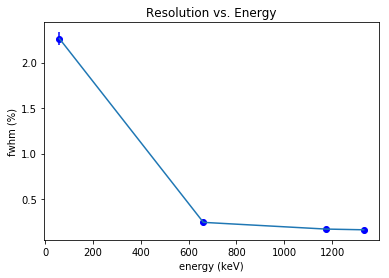

In [20]:
plt.plot(fwhm_peak_energies, fwhm_peak_values, 'ob')
plt.errorbar(fwhm_peak_energies, fwhm_peak_values, yerr=peak_err, ecolor='b')
plt.title('Resolution vs. Energy')
plt.ylabel('fwhm (%)')
plt.xlabel('energy (keV)')
plt.savefig('../figures/fwhm_vs_energy.pdf')
plt.show()

In [27]:
# find fano factor

fano_list = []
fwhm_elec = np.mean(fwhm_pulser_values) # Am-241 pulser value is very differnet. Shouldn't depend on energy. Ignore for now.
for i in range(0, len(fwhm_peak_energies), 1):
    e = fwhm_peak_energies[i]
    fwhm =(fwhm_peak_values[i] / 100) # was a percent
    fwhm = fwhm - (fwhm_elec / 100)
    fwhm = fwhm * fwhm_peak_energies[i] #fwhm in kev
    fano =fwhm * (1/2.35) * np.sqrt(1/(e*(2.9*10**(-3)))) 
    fano = fano**2
    fano = round(fano, 3)
    fano_list.append(fano)
    
fano = round(np.mean(fano_list[1:]),3)
print('average fano factor: ' + str( fano))
print('list of fano factors: ' + str(fano_list[1:]))

average fano factor: 0.039
list of fano factors: [0.072, 0.025, 0.021]


In [22]:
print('ANALYSIS COMPLETE')

ANALYSIS COMPLETE
